## Domestic flights that departed from the three major New York City airport in 2013

In [123]:
library("statsr")

In [124]:
library(dplyr)
library(ggplot2)

In [125]:
data(nycflights)

In [126]:
names(nycflights)

[1] "year"      "month"     "day"       "dep_time"  "dep_delay" "arr_time" 
 [7] "arr_delay" "carrier"   "tailnum"   "flight"    "origin"    "dest"     
[13] "air_time"  "distance"  "hour"      "minute"

In [127]:
dim(nycflights)

[1] 32735    16

In [128]:
summary(nycflights)

      year          month             day           dep_time   
 Min.   :2013   Min.   : 1.000   Min.   : 1.00   Min.   :   1  
 1st Qu.:2013   1st Qu.: 4.000   1st Qu.: 8.00   1st Qu.: 908  
 Median :2013   Median : 7.000   Median :16.00   Median :1358  
 Mean   :2013   Mean   : 6.576   Mean   :15.78   Mean   :1349  
 3rd Qu.:2013   3rd Qu.:10.000   3rd Qu.:23.00   3rd Qu.:1744  
 Max.   :2013   Max.   :12.000   Max.   :31.00   Max.   :2400  
   dep_delay          arr_time      arr_delay          carrier         
 Min.   : -21.00   Min.   :   1   Min.   : -73.000   Length:32735      
 1st Qu.:  -5.00   1st Qu.:1106   1st Qu.: -17.000   Class :character  
 Median :  -2.00   Median :1537   Median :  -5.000   Mode  :character  
 Mean   :  12.71   Mean   :1503   Mean   :   7.101                     
 3rd Qu.:  11.00   3rd Qu.:1939   3rd Qu.:  14.000                     
 Max.   :1301.00   Max.   :2400   Max.   :1272.000                     
   tailnum              flight        origin    

In [129]:
?nycflights

In [130]:
str(nycflights)

Classes 'tbl_df' and 'data.frame':	32735 obs. of  16 variables:
 $ year     : int  2013 2013 2013 2013 2013 2013 2013 2013 2013 2013 ...
 $ month    : int  6 5 12 5 7 1 12 8 9 4 ...
 $ day      : int  30 7 8 14 21 1 9 13 26 30 ...
 $ dep_time : int  940 1657 859 1841 1102 1817 1259 1920 725 1323 ...
 $ dep_delay: num  15 -3 -1 -4 -3 -3 14 85 -10 62 ...
 $ arr_time : int  1216 2104 1238 2122 1230 2008 1617 2032 1027 1549 ...
 $ arr_delay: num  -4 10 11 -34 -8 3 22 71 -8 60 ...
 $ carrier  : chr  "VX" "DL" "DL" "DL" ...
 $ tailnum  : chr  "N626VA" "N3760C" "N712TW" "N914DL" ...
 $ flight   : int  407 329 422 2391 3652 353 1428 1407 2279 4162 ...
 $ origin   : chr  "JFK" "JFK" "JFK" "JFK" ...
 $ dest     : chr  "LAX" "SJU" "LAX" "TPA" ...
 $ air_time : num  313 216 376 135 50 138 240 48 148 110 ...
 $ distance : num  2475 1598 2475 1005 296 ...
 $ hour     : num  9 16 8 18 11 18 12 19 7 13 ...
 $ minute   : num  40 57 59 41 2 17 59 20 25 23 ...


Let's think about some questions we might want to answer with these data:

- We might want to find out how delayed flights headed to a particular 
destination tend to be. 
- We might want to evaluate how departure delays vary over months. 
- Or we might want to determine which of the three major NYC airports has a better 
on time percentage for departing flights.

### Seven verbs

The `dplyr` package offers seven verbs (functions) for basic data 
manipulation:

- `filter()`
- `arrange()`
- `select()` 
- `distinct()`
- `mutate()`
- `summarise()`
- `sample_n()`

We will use some of these functions in this lab, and learn about others in a 
future lab.


## Analysis

### Departure delays in flights to Raleigh-Durham (RDU)

We can examine the distribution of departure delays of all flights with a 
histogram.

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.


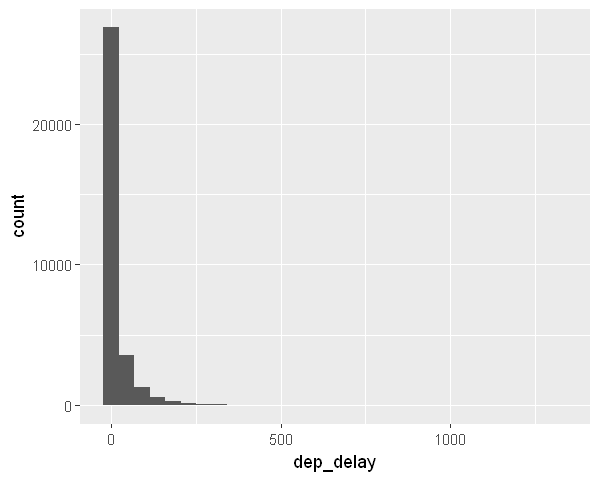

In [131]:
options(repr.plot.width=5, repr.plot.height=4)
ggplot(data=nycflights,aes(x=dep_delay)) + geom_histogram()

Histograms are generally a very good way to see the shape of a single 
distribution, but that shape can change depending on how the data is split 
between the different bins. You can easily define the binwidth you want to use:

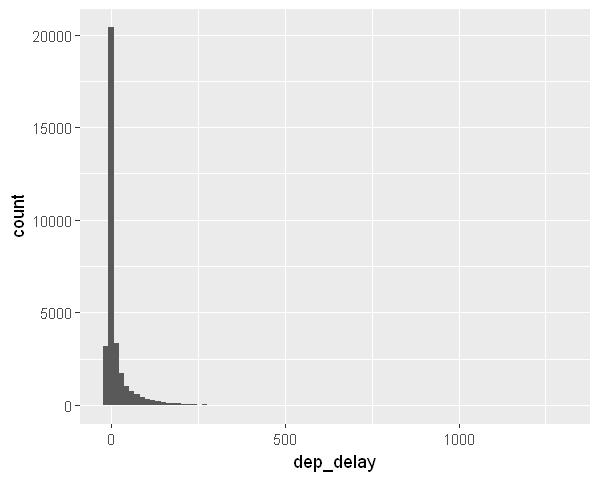

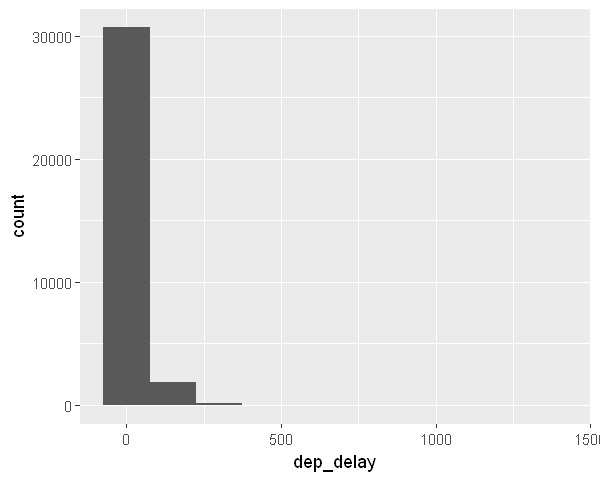

In [132]:
ggplot(data = nycflights, aes(x = dep_delay)) +
  geom_histogram(binwidth = 15)

ggplot(data = nycflights, aes(x = dep_delay)) +
  geom_histogram(binwidth = 150)

*** How do these three histograms with the various binwidths compare? ***

If we want to focus on departure delays of flights headed to RDU only, we need to
first `filter` the data for flights headed to RDU (`dest == "RDU"`) and then make
a histogram of only departure delays of only those flights.

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.


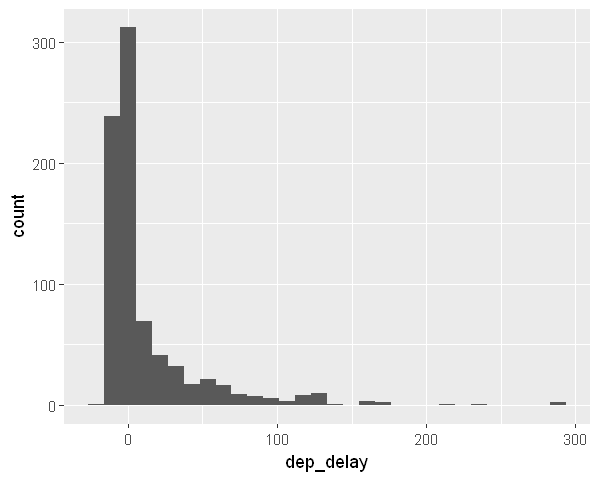

In [133]:
rdu_flights= nycflights %>% 
                        filter(dest=="RDU")
ggplot(data=rdu_flights,aes(x=dep_delay)) + geom_histogram()

#### We can also obtain numerical summaries for these flights:

In [134]:
rdu_flights %>%
            summarise(mean_dd=mean(dep_delay),sd_dd=sd(dep_delay),iqr_dd=IQR(dep_delay),n=n()) # n() reports the sample size.

mean_dd,sd_dd,iqr_dd,n
11.69913,35.55567,18,801



**Summary statistics: ** Some useful function calls for summary statistics for a 
single numerical variable are as follows:

- `mean`
- `median`
- `sd`
- `var`
- `IQR`
- `range`
- `min`
- `max`


 ### Filter based on multiple criteria

Q. Create a new data frame that includes flights headed to SFO in February, and save 
this data frame as `sfo_feb_flights`. How many flights meet these criteria? 

In [135]:
sfo_feb_flights <- nycflights %>% 
                    filter(dest=="SFO", month==2)
dim(sfo_feb_flights)

[1] 68 16

<h4> Note that we can separate the conditions using commas if we want flights that
are both headed to SFO **and** in February. If we are interested in either
flights headed to SFO **or** in February we can use the `|` instead of the comma. </h4>

Q.  Make a histogram and calculate appropriate summary statistics for **arrival** 
delays of `sfo_feb_flights`. Which of the following is false? 
<ol>
<li> The distribution is unimodal. </li> 
<li> The distribution is right skewed. </li> 
<li> No flight is delayed more than 2 hours. </li> 
<li> The distribution has several extreme values on the right side. </li>
<li> More than 50% of flights arrive on time or earlier than scheduled. </li>
</ol>

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.


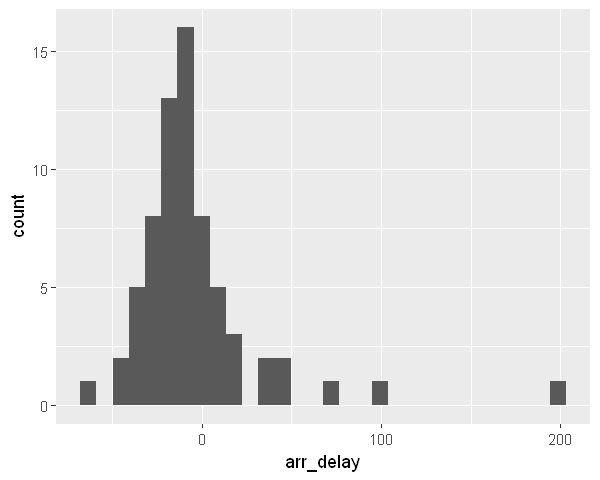

In [136]:
ggplot(data=sfo_feb_flights, aes(x=arr_delay)) +geom_histogram() #3

Using the `group_by` function to get the same summary stats for 
each origin airport:

In [137]:
rdu_flights %>% 
        group_by(origin) %>%
        summarise(dd_mean=mean(dep_delay),dd_sd=sd(dep_delay),n=n())

origin,dd_mean,dd_sd,n
EWR,13.365517,32.08492,145
JFK,15.396667,40.30535,300
LGA,7.904494,32.18620,356


Q. Calculate the median and interquartile range for `arr_delay`s of flights in the 
`sfo_feb_flights` data frame, grouped by carrier. Which carrier has the highest 
IQR of arrival delays? 
<ol>
<li> American Airlines </li> 
<li> JetBlue Airways </li> 
<li> Virgin America </li> 
<li> Delta and United Airlines </li>
<li> Frontier Airlines </li>
</ol>

In [138]:
sfo_feb_flights %>%
        group_by(carrier) %>%
        summarise(ad_median=median(arr_delay),ad_iqr=IQR(arr_delay), n=n()) %>%
        arrange(ad_iqr)

carrier,ad_median,ad_iqr,n
B6,-10.5,12.25,6
AA,5.0,17.50,10
VX,-22.5,21.25,12
DL,-15.0,22.00,19
UA,-10.0,22.00,21


### Departure delays over months

Q. Which month would you expect to have the highest average delay departing 
from an NYC airport?

In [139]:
monthly_dd <- nycflights %>%
        group_by(month) %>%
        summarise(dd_avg=mean(dep_delay),n=n()) %>%
        arrange(desc(dd_avg))
monthly_dd

month,dd_avg,n
7,20.754559,2742
6,20.350293,2732
12,17.368189,2716
4,14.554477,2781
3,13.517602,2869
5,13.264800,2821
8,12.619097,2880
2,10.687227,2286
1,10.233333,2610
9,6.872436,2681


Q.  Is the mean or the median a more reliable measure for deciding which month(s) to 
avoid flying if you really dislike delayed flights, and why? 
<ol>
<li> Mean would be more reliable as it gives us the true average. </li> 
<li> Mean would be more reliable as the distribution of delays is symmetric. </li> 
<li> Median would be more reliable as the distribution of delays is skewed. </li> 
<li> Median would be more reliable as the distribution of delays is symmetric. </li>
<li> Both give us useful information. </li>
</ol>

In [140]:
mean(monthly_dd$dd_avg)

[1] 12.6838

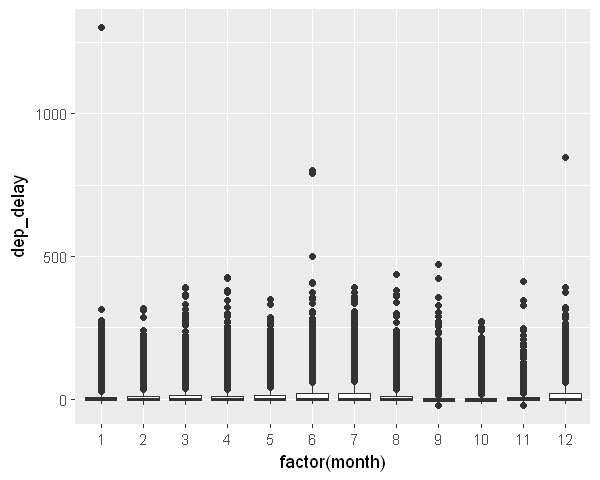

In [141]:
ggplot(nycflights, aes(x = factor(month), y = dep_delay)) +
  geom_boxplot()

### On time departure rate for NYC airports

Suppose you will be flying out of NYC and want to know which of the 
three major NYC airports has the best on time departure rate of departing flights. 
Suppose also that for you a flight that is delayed for less than 5 minutes is 
basically "on time". You consider any flight delayed for 5 minutes of more to be 
"delayed".

In order to determine which airport has the best on time departure rate, 
we need to 

- first classify each flight as "on time" or "delayed",
- then group flights by origin airport,
- then calculate on time departure rates for each origin airport,
- and finally arrange the airports in descending order for on time departure
percentage.

If you were selecting an airport simply based on on time departure percentage, 
which NYC airport would you choose to fly out of? 


In [142]:
nycflights  <- nycflights %>% 
        mutate(dep_type=ifelse(dep_delay<5,"on time","delayed")) 
nycflights %>%
        group_by(origin) %>%
        summarise(ot_dep_rate = sum(dep_type == "on time") / n()) %>%
        arrange(ot_dep_rate)

origin,ot_dep_rate
EWR,0.6369892
JFK,0.6935854
LGA,0.7279229


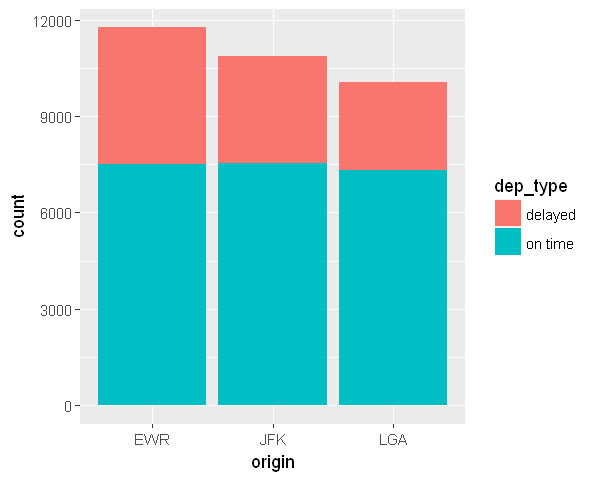

In [143]:
ggplot(data=nycflights,aes(x=origin,fill=dep_type)) + geom_bar()

Q. Mutate the data frame so that it includes a new variable that contains the 
average speed, `avg_speed` traveled by the plane for each flight (in mph). What is 
the tail number of the plane with the fastest `avg_speed`? **Hint:** Average speed 
can be calculated as distance divided by number of hours of travel, and note that 
`air_time` is given in minutes. If you just want to show the `avg_speed` and 
`tailnum` and none of the other variables, use the select function at the end of your 
pipe to select just these two variables with `select(avg_speed, tailnum)`. You can 
Google this tail number to find out more about the aircraft. 

In [144]:
nycflights  <- nycflights %>% 
        mutate(avg_speed=distance/air_time)
head(nycflights %>%
            select(tailnum,avg_speed) %>%
            arrange(desc(avg_speed)))

tailnum,avg_speed
N666DN,11.723077
N779JB,9.290698
N571JB,9.236994
N568JB,9.131429
N5EHAA,9.131429
N656JB,9.131429


Q. Make a scatterplot of `avg_speed` vs. `distance`. Which of the following is true 
about the relationship between average speed and distance. 
<ol>
<li> As distance increases the average speed of flights decreases. </li> 
<li> The relationship is linear. </li> 
<li> There is an overall postive association between distance and average speed.</li> 
<li> There are no outliers. </li> 
<li> The distribution of distances are uniform over 0 to 5000 miles. </li> 
</ol>

`geom_smooth()` using method = 'gam'


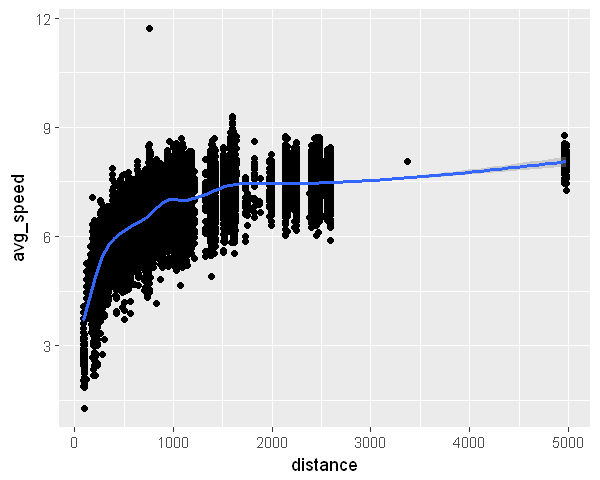

In [147]:
ggplot(data=nycflights,aes(x=distance,y=avg_speed))+geom_point() +geom_smooth()

Q. Suppose you define a flight to be "on time" if it gets to the destination on 
time or earlier than expected, regardless of any departure delays. Mutate the data 
frame to create a new variable called `arr_type` with levels `"on time"` and 
`"delayed"` based on this definition. Then, determine the on time arrival percentage 
based on whether the flight departed on time or not. What proportion of flights  that 
were `"delayed"` departing arrive `"on time"`? 

In [151]:
nycflights <- nycflights %>%
  mutate(arr_type = ifelse(arr_delay < 0, "on time", "delayed"))

nycflights$arr_type <- as.factor(nycflights$arr_type)
proportion <- as.array(table(nycflights$arr_type))
prop.table(proportion)


  delayed   on time 
0.4280128 0.5719872 